# 映画のレビューの感情分析

## 【ライブラリのインポート】

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%matplotlib inline
sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

from sklearn.feature_extraction.text import CountVectorizer

CountVectorizerをインスタンス化

In [2]:
vect = CountVectorizer()

解析されたフレーズごとに分類精度（正しく予測されたラベルの割合）で評価される。<br>
0:否定的<br>
1:やや否定的<br>
2:中立<br>
3:やや肯定的<br>
4:肯定的

提出形式・・・テストセット内の各フレーズについて、感情のラベルを予測する。<br>
**PhraseID, Sentiment**という形式で提出する。

## 【データセットをpandasで読みこむ。】

In [3]:
train_df = pd.read_csv("train.tsv", delimiter='\t')
test_df = pd.read_csv("test.tsv", delimiter='\t')

In [4]:
train_df[train_df['Phrase'].isnull()]

,PhraseId,SentenceId,Phrase,Sentiment


In [5]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


#### 欠損値の確認
欠損値のあるデータを見てたところ、欠損値は存在しなかった。
（ちなみに、欠損値が存在する行を削除する手法を、「リストワイズ法」という。<br>
これは、訓練データにのみ使用することができる。<br>
訓練データの削除は「削除したデータは学習に使用しない」と捉えることができるが、<br>テストデータは予測しなければならないデータなので、削除を行なった場合は、欠損値をもつサンプルに対する予測を破棄することになり、望ましくない。

In [7]:
train_df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [8]:
test_df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
dtype: int64

## 【探索的データ分析】

・スコア「２」のレビューが多そう。（「中立」のレビュー）<br>
・同一なレビューは無い。（freq=1だから）

In [9]:
train_df.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [10]:
train_df.describe(exclude='number')

,Phrase
count,156060
unique,156060
top,A series of escapades demonstrating the adage ...
freq,1


文字数を算出してみる。

In [14]:
train_df['Phrase_len'] = train_df.Phrase.apply(len)
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_len
0,1,1,A series of escapades demonstrating the adage ...,1,188
1,2,1,A series of escapades demonstrating the adage ...,2,77
2,3,1,A series,2,8
3,4,1,A,2,1
4,5,1,series,2,6


Text(0.5, 0, 'Phrase Length')

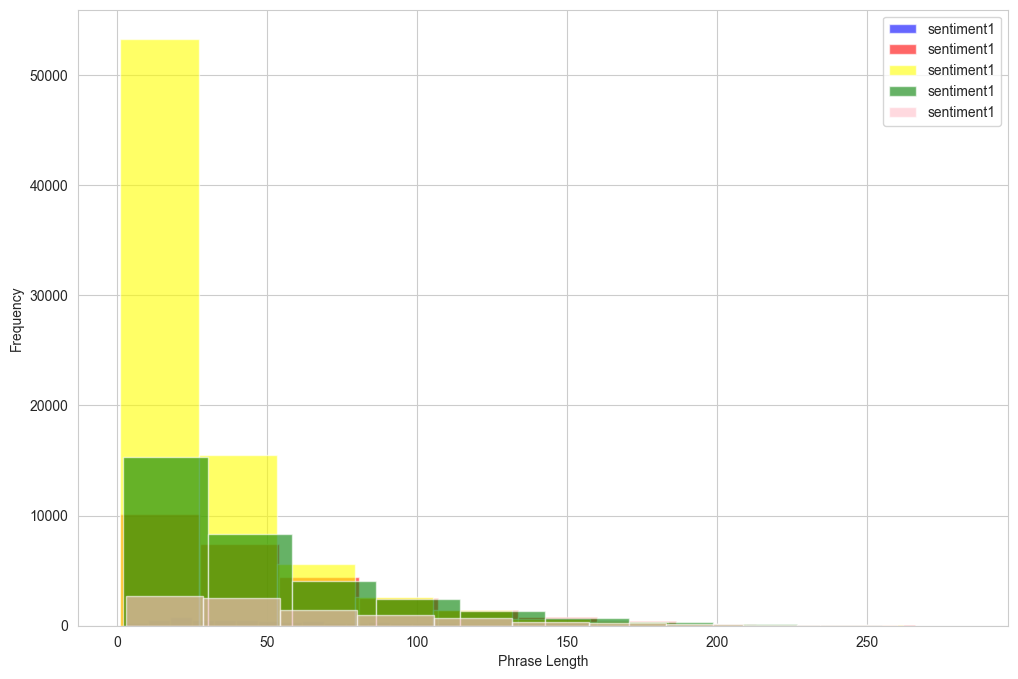

In [26]:
plt.figure(figsize=(12, 8))
# fig, axes = plt.subplots(2, 3)

train_df[train_df.Sentiment==0].Phrase_len.plot(bins=35, kind='hist', color='blue', label='sentiment1', alpha=0.6)
train_df[train_df.Sentiment==1].Phrase_len.plot(kind='hist', color='red', label='sentiment1', alpha=0.6)
train_df[train_df.Sentiment==2].Phrase_len.plot(kind='hist', color='yellow', label='sentiment1', alpha=0.6)
train_df[train_df.Sentiment==3].Phrase_len.plot(kind='hist', color='green', label='sentiment1', alpha=0.6)
train_df[train_df.Sentiment==4].Phrase_len.plot(kind='hist', color='pink', label='sentiment1', alpha=0.6)

plt.legend()
plt.xlabel("Phrase Length")

↑見た目変えたい